In [68]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.stats import skew, kurtosis, moment

import numpy as np
from scipy.stats import skew, kurtosis, moment
from scipy.fft import fft, ifft

# Assuming 'x' and 'Fbe' are already defined, and 'Fs' is the sampling frequency
# Make sure 'x' is a numpy array (e.g., x = np.array([...]))

def loychikSD_NP(x, Fs, Fbe):
    # Frequency bin centers
    F = Fbe[:-1] + np.diff(Fbe)

    X = fft(x)
    t = np.arange(0, len(x)) / Fs  # equivalent to the original t calculation
    dF = 1 / t[-1]
    Ff = np.arange(0, len(x)) * dF

    # Statistical moments
    M = np.array([
        np.mean(x),
        np.var(x),
        skew(x),
        kurtosis(x),
        moment(x, 1),
        moment(x, 2),
        moment(x, 3)
    ])

    # Initialize result arrays
    Gx = np.zeros(len(F))
    Sx = np.zeros(len(F))
    Kx = np.zeros(len(F))
    M3x = np.zeros(len(F))
    M4x = np.zeros(len(F))
    
    #Kx = M4x/(Gx)^2

    for ii in range(len(F)):
        if(ii%5==0):
            print(f"{ii + 1} / {len(F)}")  # Counter to determine where you are in run

        # Begin low-pass filter by zeroing bins
        Xn = np.argmax(Ff >= Fbe[ii + 1])  # find the first index where Ff >= Fbe[ii + 1]

        cutX = X[1:Xn]
        XI = np.zeros_like(X)
        XI[1:Xn] = cutX

        # Flipping and conjugating for symmetry
        XI = np.flipud(XI)
        XI[0:Xn - 1] = np.conj(cutX)
        XI = np.flipud(XI)

        xifft = ifft(XI)

        # Extracting the real part of the inverse FFT result
        real_xifft = np.real(xifft)  # this makes sure you're calculating statistics on real numbers

        # Statistical calculations
        Gx[ii] = np.var(real_xifft)
        Sx[ii] = skew(real_xifft)
        Kx[ii] = kurtosis(real_xifft)
        M3x[ii] = moment(real_xifft, 3)
        M4x[ii] = moment(real_xifft, 4)

    return M, F, Gx, Sx, Kx

# The variables Gx, Sx, Kx, M3x, M4x hold the results and can be used as needed



In [85]:
import numpy as np
import scipy.io
import scipy.signal
import scipy.ndimage

# The octspace function is not directly available in Python's standard libraries, you may have to implement it
# Fbe = octspace(10, 6000, 12).center  # Your octave space function
Fbe = np.logspace(np.log10(10), np.log10(6000), 100)  # Placeholder using logspace
Fbe = Fbe  # Assuming Fbe.center in MATLAB just returns Fbe

### Audio Input

In [86]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
#filefolder = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx, Sx, Kx = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx1 = np.gradient(Gx, F)

# Skewness Spectral Density
Sxx1 = np.gradient(Sx, F)

# Kurtosis Spectral Density
Kxx1 = np.gradient(Kx, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx": Gx, "Sx": Sx, "Kx": Kx})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_4382/867470315.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann/0000.wav")


1 / 99
6 / 99
11 / 99
16 / 99
21 / 99
26 / 99
31 / 99
36 / 99
41 / 99
46 / 99
51 / 99
56 / 99
61 / 99
66 / 99
71 / 99
76 / 99
81 / 99
86 / 99
91 / 99
96 / 99
MAT file saved. Mission accomplished.


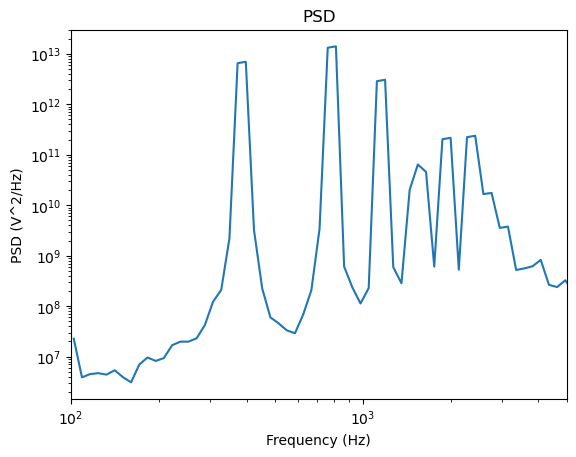

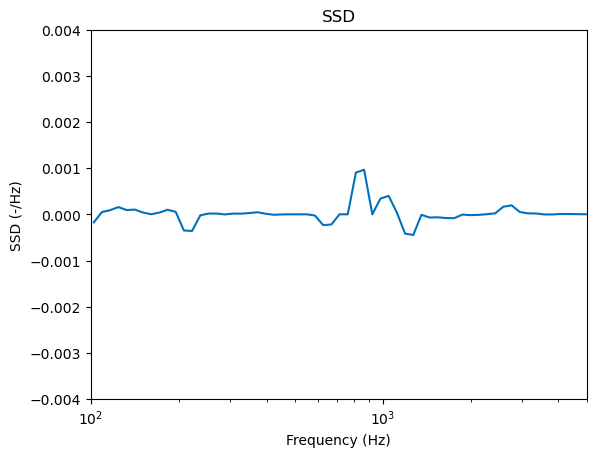

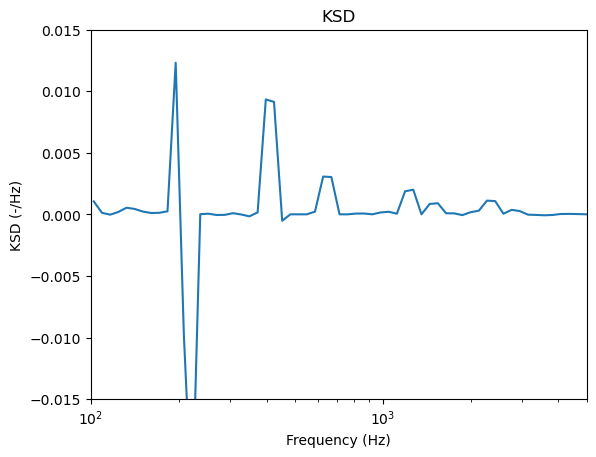

In [87]:
# Graphs

import matplotlib.pyplot as plt
import scipy.io
import numpy as np

# Load MAT file
data = scipy.io.loadmat("Audio-1.mat")
GxxW = data['Gx']
f = data['F']

#Figure 1
# plt.figure(1)

# plt.subplot(1, 2, 1)
# plt.loglog(f, GxxW[:, 2], linewidth=1.5)
# plt.ylabel('PSD (g^2/Hz)')
# plt.xlabel('Frequency (Hz)')
# plt.title('PSD of Signal')

# plt.subplot(1, 2, 2)
# plt.loglog(f, GxxW[:], linewidth=1.5)
# plt.ylabel('PSD (g^2/Hz)')
# plt.xlabel('Frequency (Hz)')
# plt.title('PSD from Different Seeds at Different Frequencies')
# plt.legend(['Gaussian Process', 'Lognormal Process'], loc='lower left')


# Figure 2
# plt.figure(2)
# plt.clf()

# plt.subplot(2, 2, (1, 2))
# plt.semilogy(faaa, xaaa, linewidth=2, color=[.4, .4, .4])
# plt.semilogy(faaa2, xaaa2, linewidth=2, color=[.7, .7, .7])
# plt.xlim([-20, 10])
# plt.ylim([.000001, 1.1])
# plt.ylabel('Probability Density (log-scale)')
# plt.xlabel('Sample')
# plt.legend(['Gaussian', 'Non-Gaussian'])

# 
# Figure 2 (continued)
# plt.subplot(2, 2, 3)
# plt.plot(tclip, xclip1, color=[.4, .4, .4])
# plt.xlim([0, 2])
# plt.ylim([-10, 10])
# plt.title('Gaussian')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')

# plt.subplot(2, 2, 4)
# plt.plot(tclip, xclip2, color=[.7, .7, .7])
# plt.xlim([0, 2])
# plt.ylim([-10, 10])
# plt.title('Non-Gaussian')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')

# # Figure 3
plt.figure(3)
plt.loglog(F[F>100],Gxx[35:], linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([100, 5000])

# Figure 4
plt.figure(4)
plt.semilogx(F[F>100], Sxx1[35:], linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([100, 5000])
plt.ylim([-.004, .004])

# # Figure 5
plt.figure(5)
plt.semilogx(F[F>100], Kxx1[35:], linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([100, 5000])
plt.ylim([-.015, .015])

plt.show()


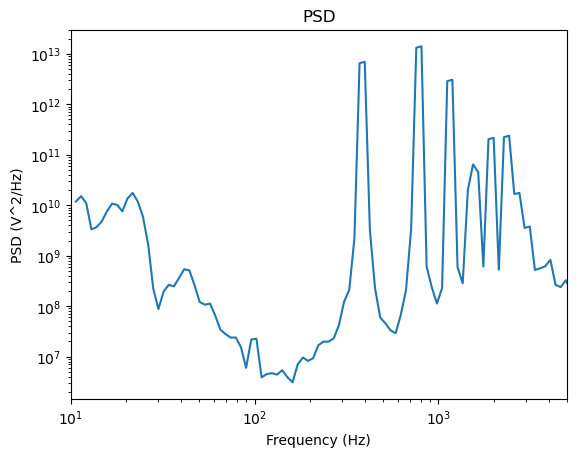

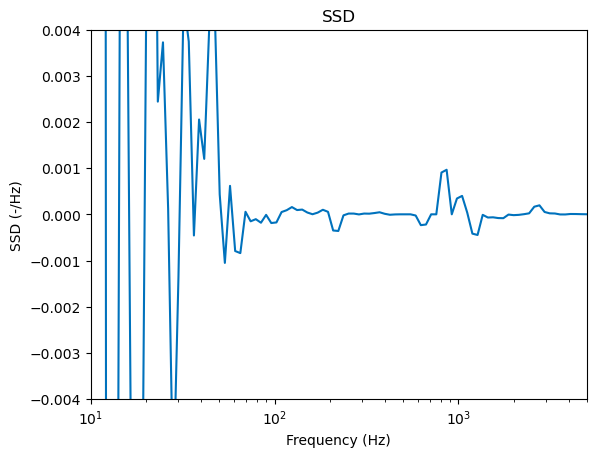

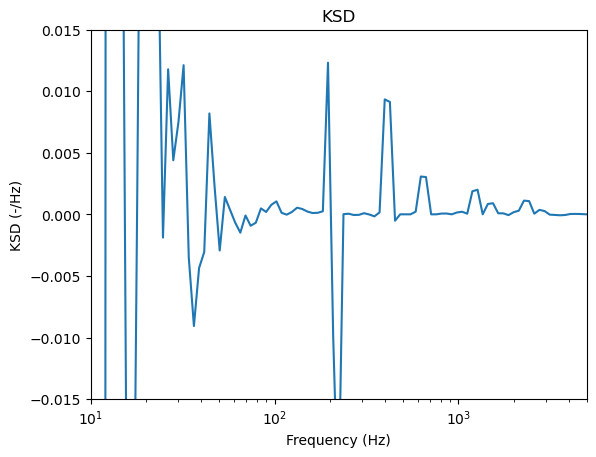

In [88]:
plt.figure(3)
plt.loglog(F, Gxx, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx1, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx1, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

## Instrument 2(Flute)

In [89]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
sample_rate, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx, Sx, Kx = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx2 = np.gradient(Gx, F)

# Skewness Spectral Density
Sxx2 = np.gradient(Sx, F)

# Kurtosis Spectral Density
Kxx2 = np.gradient(Kx, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx": Gx, "Sx": Sx, "Kx": Kx})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_4382/3624575525.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0000.wav")


1 / 99
6 / 99
11 / 99
16 / 99
21 / 99
26 / 99
31 / 99
36 / 99
41 / 99
46 / 99
51 / 99
56 / 99
61 / 99
66 / 99
71 / 99
76 / 99
81 / 99
86 / 99
91 / 99
96 / 99
MAT file saved. Mission accomplished.


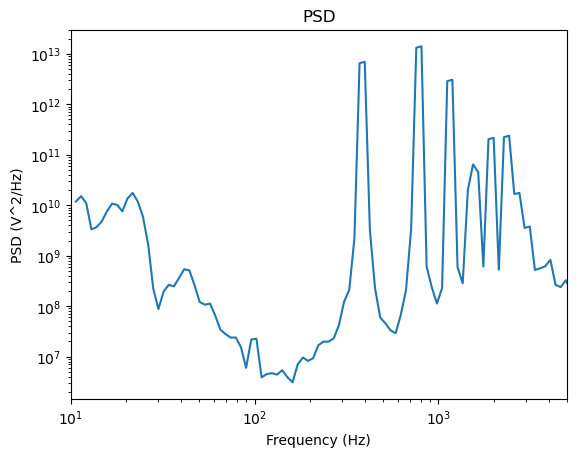

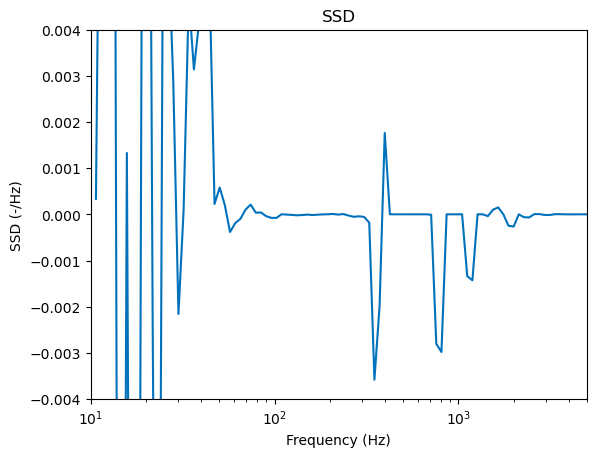

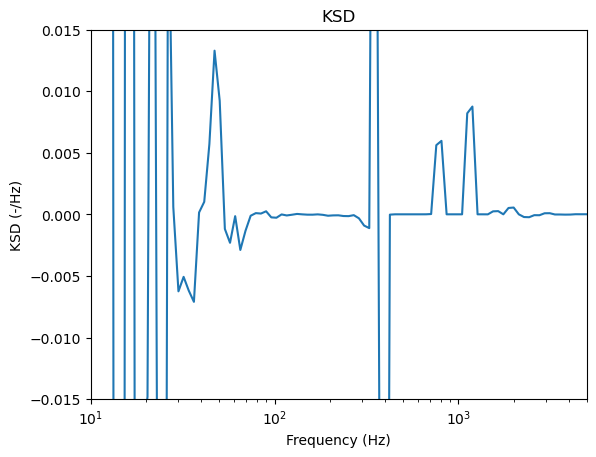

In [90]:
plt.figure(3)
plt.loglog(F, Gxx2, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx2, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx2, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

## Instrument 3 (trumpet)

In [91]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

from scipy.io import wavfile

# Read audio file
sample_rate, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0000.wav")

# Use the audio_data as your x3 or whichever variable you want to replace
x3 = audio_data.astype(float)


M, F, Gx, Sx, Kx = loychikSD_NP(x3, Fs, Fbe)

# Power Spectral Density
Gxx3 = np.gradient(Gx, F)

# Skewness Spectral Density
Sxx3 = np.gradient(Sx, F)

# Kurtosis Spectral Density
Kxx3 = np.gradient(Kx, F)

# Fourth Central Moment Spectral Density
# M4xx = np.gradient(Kx * Gx ** 2, F)

# Clear variables
# del x, x2, x3

# Save variables
scipy.io.savemat("Audio-1.mat", {"M": M, "F": F, "Gx": Gx, "Sx": Sx, "Kx": Kx})

print("MAT file saved. Mission accomplished.")




/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_4382/3977292511.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read("/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0000.wav")


1 / 99
6 / 99
11 / 99
16 / 99
21 / 99
26 / 99
31 / 99
36 / 99
41 / 99
46 / 99
51 / 99
56 / 99
61 / 99
66 / 99
71 / 99
76 / 99
81 / 99
86 / 99
91 / 99
96 / 99
MAT file saved. Mission accomplished.


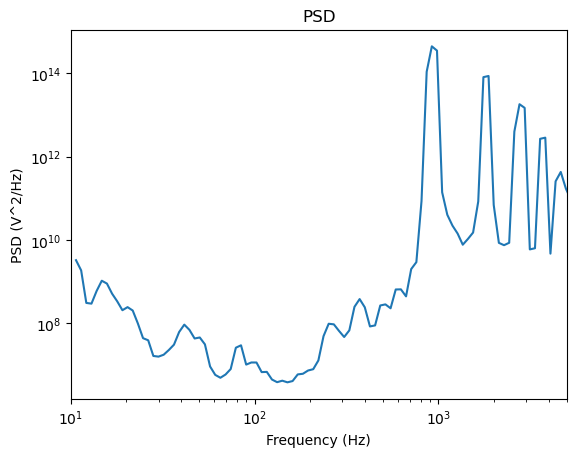

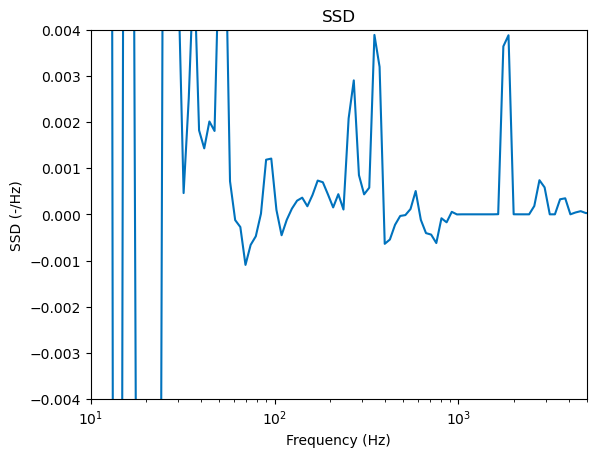

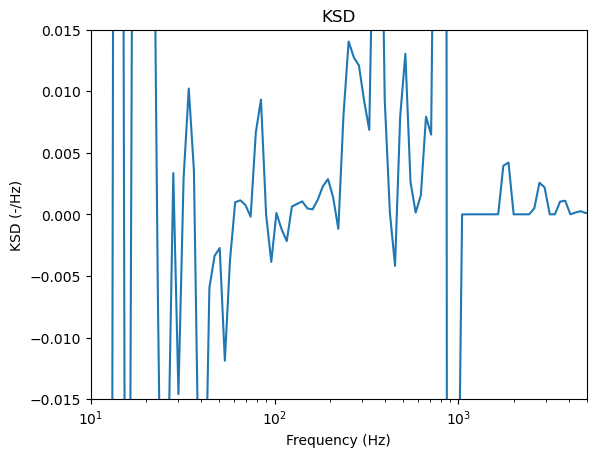

In [92]:
plt.figure(3)
plt.loglog(F, Gxx3, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])

plt.figure(4)
plt.semilogx(F, Sxx3, linewidth=1.5, color=[0, 0.4470, 0.7410])
plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.004, .004])

plt.figure(5)
plt.semilogx(F, Kxx3, linewidth=1.5)
plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])

plt.show()

### Overlap of Violin, flute and trumpet

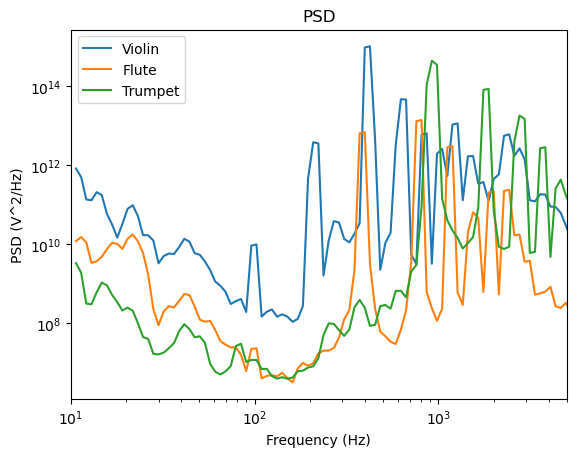

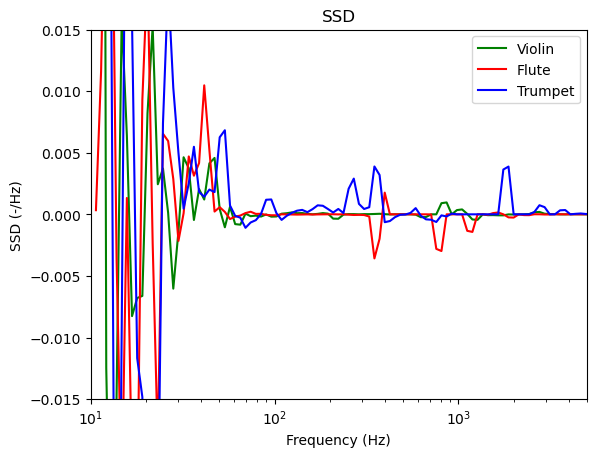

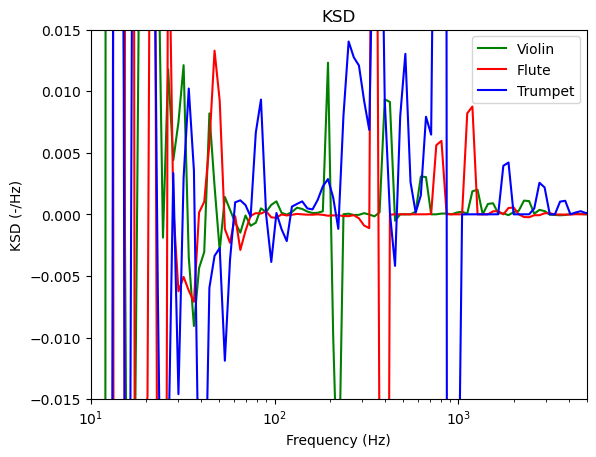

In [94]:
plt.figure(3)
plt.loglog(F, Gxx1, linewidth=1.5)
plt.loglog(F, Gxx2, linewidth=1.5)
plt.loglog(F, Gxx3, linewidth=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.xlim([10, 5000])
plt.legend(labels=["Violin", "Flute","Trumpet"])

plt.figure(4)
plt.semilogx(F, Sxx1, linewidth=1.5,color='green',label="Violin")
plt.semilogx(F, Sxx2, linewidth=1.5,color='red',label="Flute")
plt.semilogx(F, Sxx3, linewidth=1.5,color='blue',label="Trumpet")

plt.title('SSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('SSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])
plt.legend(labels=["Violin", "Flute","Trumpet"])

plt.show()
plt.figure(5)
plt.semilogx(F, Kxx1, linewidth=1.5,color='green',label="Violin")
plt.semilogx(F, Kxx2, linewidth=1.5,color='red',label="Flute")
plt.semilogx(F, Kxx3, linewidth=1.5,color='blue',label="Trumpet")

plt.title('KSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('KSD (-/Hz)')
plt.xlim([10, 5000])
plt.ylim([-.015, .015])
plt.legend(labels=["Violin", "Flute","Trumpet"])

plt.show()

## Creation of Mat files

In [99]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np
import os

from scipy.io import wavfile

instruments = ['violin_raquel_richness','flute_almudena_stability','trumpet_ramon_pitch_stability']
# Read audio file
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann"


In [100]:
filelist = []
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"
for i in instruments:
    filetemp = filepath+i+'/'+'neumann'
    for filename in os.listdir(filetemp):
        if filename.endswith('.wav'):
            filelist.append(filename)
len(filelist)

166

In [101]:
audio_data = []

import scipy.io
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

# explore the data size from 12 to 120 ?

Fbe = np.logspace(np.log10(10), np.log10(6000), 120)  # Placeholder using logspace
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"

from scipy.io import wavfile

import os
for i,file in enumerate(instruments):
    fp = filepath+''+file+'/neumann/'
    print(fp)
    arr = [fp + x for x in os.listdir(fp) if x.endswith('.wav')]
    print(arr)
    for j,f in enumerate(arr):
        print(f)
        with open(f, 'rb') as wf:
            Fs, audio_data = wavfile.read(wf)
        x3 = audio_data.astype(float)

        M, F, Gx, Sx, Kx = loychikSD_NP(x3, Fs, Fbe)

        # Power Spectral Density
        Gxx = np.gradient(Gx, F)

        # Skewness Spectral Density
        Sxx = np.gradient(Sx, F)

        # Kurtosis Spectral Density
        Kxx = np.gradient(Kx, F)

        # Fourth Central Moment Spectral Density
        # M4xx = np.gradient(Kx * Gx ** 2, F)

        # Clear variables
        # del x, x2, x3

        # Save variables
        # Specify the filename
        output_path = '/Users/karthikkurella/Documents/Audio_mat/'
        filename = f"{file.split('_')[0]}-{j+1}.mat"

        mat_data = {
        "M": M,
        "F": F,
        "Gx": Gx,
        "Sx": Sx,
        "Kx": Kx
        }

        # Save the dictionary into a .mat file
        scipy.io.savemat(output_path+filename, mat_data)

        print(f"Saved {filename}")

/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/
['/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0010.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0004.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0038.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0039.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0005.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0011.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0007.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0013.wav', '/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0012.wav', '/Users/karthikkurel

/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_4382/3592832673.py:24: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, audio_data = wavfile.read(wf)


11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0038.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0039.wav
1 / 119
6 / 119
1

Saved violin-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0070.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0058.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0059.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 11

46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-50.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0057.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-51.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0043.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved violin-52.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_richness/neumann/0042.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 11

16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0005.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0011.wav
1 / 119
6 / 119
11 / 11

106 / 119
111 / 119
116 / 119
Saved flute-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0032.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0033.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved flute-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/flute_almudena_stability/neumann/0027.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 /

11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-1.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0004.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-2.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0038.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-3.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/00

16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-25.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0053.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-26.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0045.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-27.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0051.wav

26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-49.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0037.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-50.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0036.wav
1 / 119
6 / 119
11 / 119
16 / 119
21 / 119
26 / 119
31 / 119
36 / 119
41 / 119
46 / 119
51 / 119
56 / 119
61 / 119
66 / 119
71 / 119
76 / 119
81 / 119
86 / 119
91 / 119
96 / 119
101 / 119
106 / 119
111 / 119
116 / 119
Saved trumpet-51.mat
/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_pitch_stability/neumann/0022.wav
1 / 119
6 / 119
1